<a href="https://colab.research.google.com/github/capabledjay/Deep_Learning_With_Pytorch/blob/main/02_PyTorch_Workflow__Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow
The essence of machine learning and deep learning is to take data from the past, create algorithms (like neural networks) that discover patterns in that data, and use the discovered patterns to make prediction for the future.

There are many ways to do this, and many new ones are being discovered all the time.

How about we start small so we can fully understand how this works.

Let's starting with a straight line and let's see if we can learn a linear pattern and create a PyTorch model that matches it.

Below is typical picture representation of a PyTorch workflow

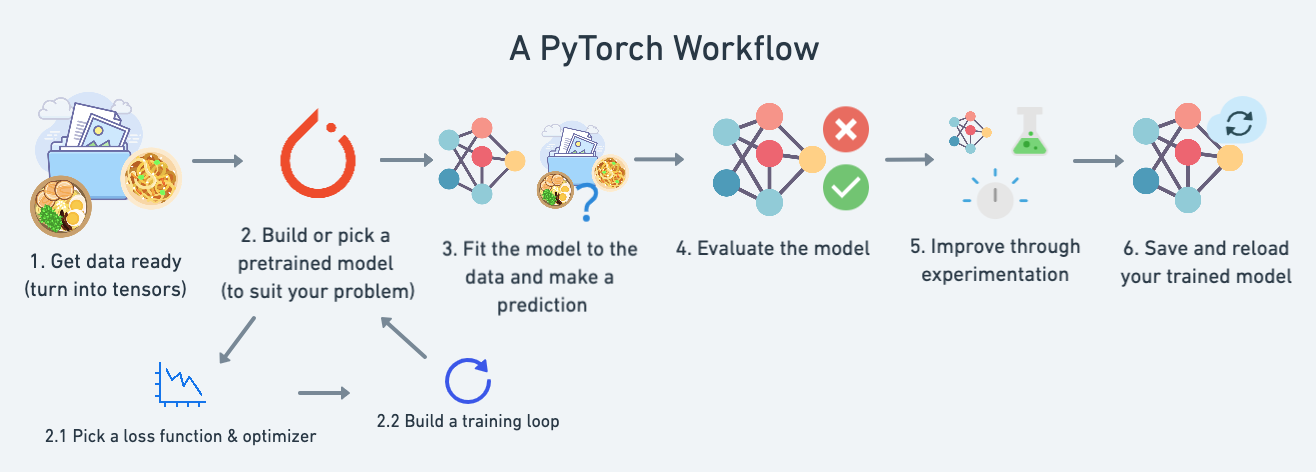

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

And now let's import what we'll need for this module.

We're going to get torch, torch.nn (nn stands for neural network and this package contains the building blocks for creating neural networks in [PyTorch](https://pytorch.org/docs/stable/nn.html)) and matplotlib.




In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt # for visualization

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

### Data (preparing and loading)

**Data** in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.



Machine learning is a game of two parts:

* Turn your data, whatever it is, into numbers (a representation).
* Pick or build a model to learn the representation as best as possible.

Sometimes one and two can be done at the same time.

Let's assumed we don't have data, which is true right now.
Well, that's where we're at now.

No data.

we can create some.
Let's create our data as a straight line.

We'll use linear regression to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

Don't worry if the terms above don't mean much now, we'll see them in action and I'll put extra resources below where you can learn more.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

y[:10], X[:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [ ]:
len(X),len(y)

(50, 50)


Beautiful! Now we're going to move towards building a model that can learn the relationship between X (features) and y (labels)

if you notice also, "X" is in capital which means its a Tensor and "y" in a lower case meaning its vector, you can check that out from the first lecture

### Split data into training and test sets

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:



In [ ]:
#creat a train/test split

train_split = int(0.8*len(y))
train_split

40

In [ ]:
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

let visualize what out data looks like

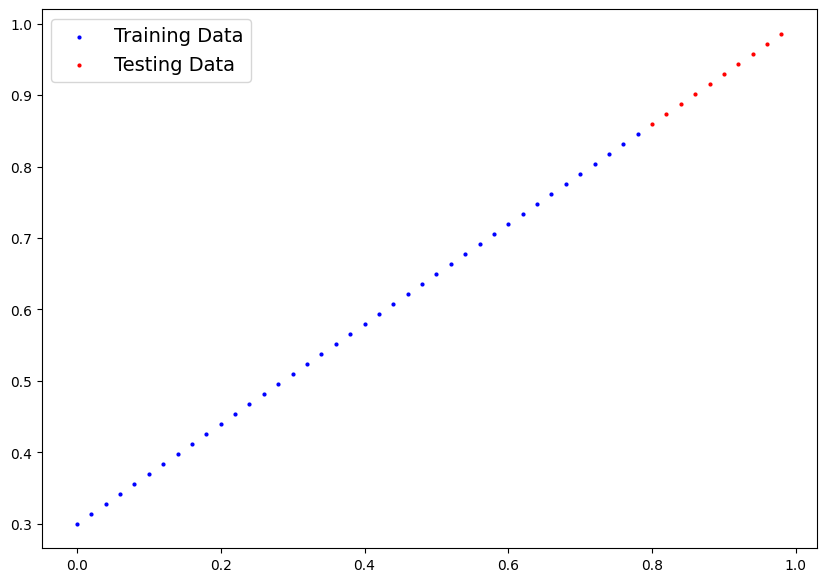

In [ ]:
def plot_prediction( train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     prediction = None):
  # Plot training data, test data and compares prediction

  plt.figure(figsize = (10,7))

  # ploting the training data in blue
  plt.scatter(train_data,train_label, c="b",s=4, label ="Training Data")

  # plot the test data in red
  plt.scatter(test_data,test_label, c="r",s=4, label ="Testing Data")

  # prediction
  if prediction != None:
    # plot the predictions if they exist
    plt.scatter(test_data, prediction, c="g", s=4, label ="Predictions")

  plt.legend(prop={"size":14});



plot_prediction()

### Building a PyTorch linear model



In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



what does this model do ?
* start with random values ( weight and bias )
* Look at the training data and adjust the random values to better represent (or get closer to ) the ideal values ( weight and bias values we used to create the data )

How it do so ?
Through 2 main algorithms:
1. Gradient descent
2. Backpropagation


### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are ***torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader.*** For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

* torch.nn : Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
* torch.nn.Parameter : Stores tensors that can be used with nn.Module.
If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
* torch.nn.Module: The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
* torch.optim: Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
* def forward():	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

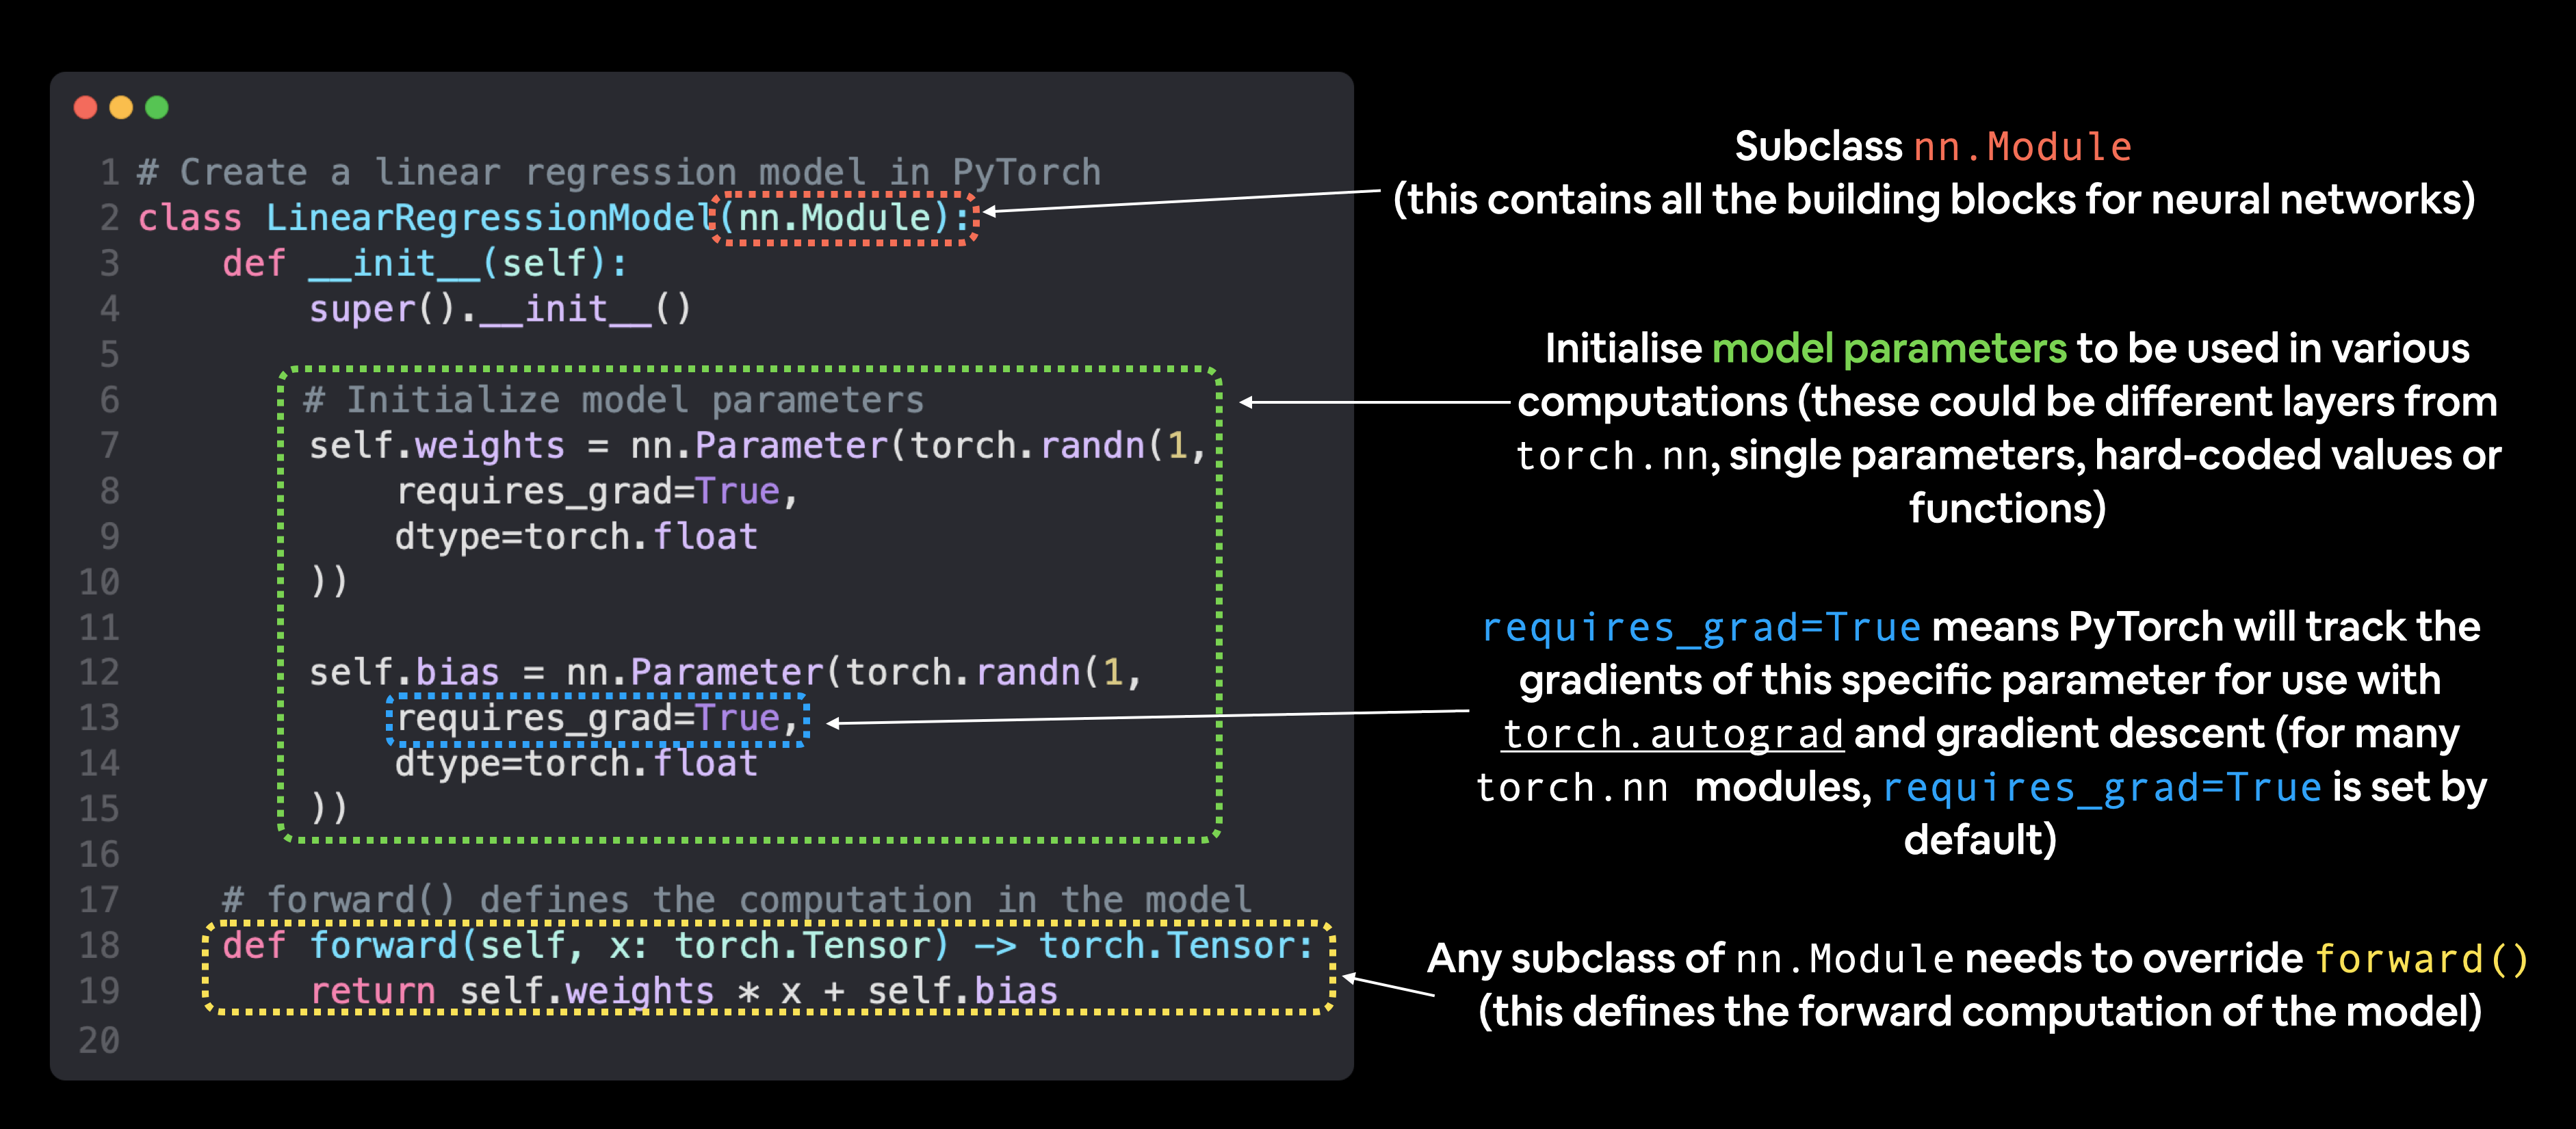

### Checking the contents of a PyTorch model

Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using ***.parameters().***

In [89]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]


We can also get the state (what the model contains) of the model using
***.state_dict()***.

*Parameters: these are values that the model sets itself

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Making predictions using torch.inference_mode()
To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [111]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad(),
# however inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


Hmm?

You probably noticed we used torch.inference_mode() as a context manager (that's what the
*with torch.inference_mode(): *is) to make the predictions.

As the name suggests, *torch.inference_mode()* is used when using a model for inference (making predictions).

*torch.inference_mode()* turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.



*Note: In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things*

In [112]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])



Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one X value maps to one y value.

Our predictions are still numbers on a page, let's visualize them with our **plot_predictions()** function we created above.

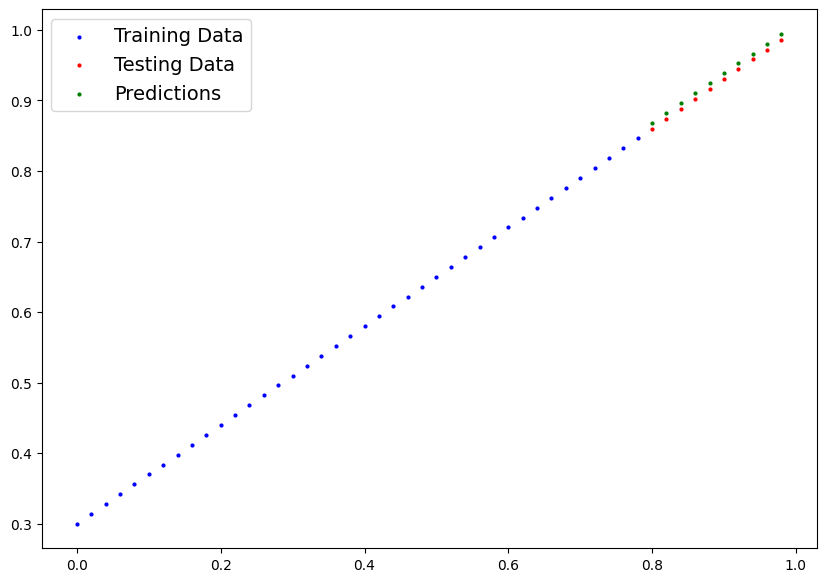

In [113]:
plot_prediction(prediction=y_preds)


Woah! Those predictions look pretty bad...

This make sense though when you remember our model is just using random parameter values to make predictions.

It hasn't even looked at the blue dots to try to predict the red dots.

Time to change that.

### Train model

the whole idea of training a model is for a model to move from some *unknown* parameters (these maybe random) to some *known* parameters.

or in other words from a poor representation of data to a better representation of data.

And one way to measure how poor or how wrong a model's predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different area. for our case, we're going to refer to it as a Loss Function.

Thing we need to train:
* **Loss Function:** A function to measure how wrong a model"s predictions are to the idea outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and parameters(e.g weight and bias in our case) to improve the loss function.

And specifically for PyTorch we need,
* A training loop
* A testing loop

### Loss function

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).
* Resources: [Torch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.
* Resources: [Torch documentation](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss)


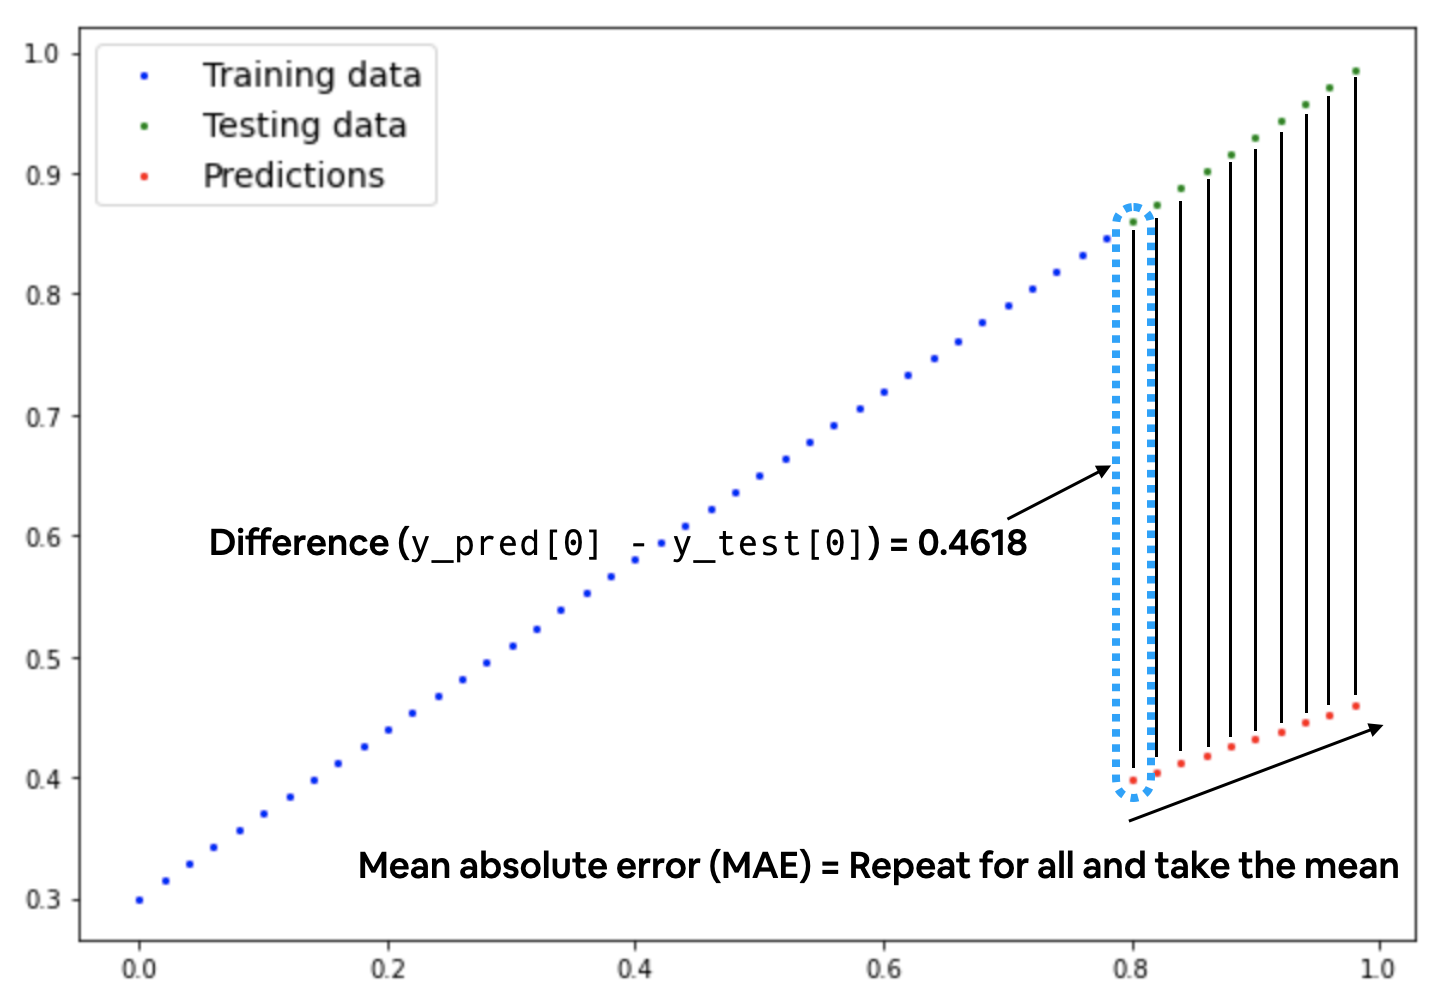

#### Optimizer
Here, we use the SGD ( stochastic gradient descent) optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.
* Resources: [Torch documentation](https://pytorch.org/docs/stable/optim.html#how-to-use-an-optimizer)


We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

*  Note: learning rate(**lr**) is possibily the most important hyperparameter one can set, the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning [rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate).

In [93]:
#  setting up a loss function
loss_fn = nn.L1Loss()

# set up an optimizer ( stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01)


**Q:** which loss function and optimizer should i use

**A:** this will be problem specific, but withexperience you'll get the idea of what works and what doesent workwith a particular problem set.

E.g regression problem, a loss function *nn.L1Loss()* and an optimizer like *torch.optim.SGD()*
But for classification problem, you'll likely want to use a loss function of *nn.BCELoss()* [binary cross entropy loss]

### Creating an optimization loop in PyTorch

Woohoo! Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the features and labels.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

A couple of things we need in a training loop:
  * Loop through the data
  * Forward pass: The model goes through all of the training data once, performing its *forward()* function calculations.
  * Calculate the loss: The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.
  *Optimizer zero grad:
  * Loss backward: move backwards through the network to calculate the gradient of each of the model's parameters with respect to the loss. This is known as backpropagation, hence "backwards".
  * Optimizer steps: use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [108]:
# torch.manual_seed(42)
epoch = 100
#  An epoch is one loop through the data. this is an hyperparameter cause we set ourself


# looping through the data
for epoch in range(epoch):
  ### Training
  # set the model to train mode
  model_0.train()  # train model in pytorch set all parameters that requires gradient to require gradient

  # forward pass
  y_preds = model_0(X_train)

  # calculate loss
  loss = loss_fn(y_preds, y_train)
  # print(f"Loss{loss}")
  # optimizer zero grad
  optimizer.zero_grad()

  # perform backpropagation on the loss with respect to the model's parameter
  loss.backward()

  # step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  # Put the model in evaluation mode
  model_0.eval() #turns off di fferent setting in the model not need for evaluation/testing (dropout layer / bash norm )

  with torch.inference_mode(): #turns off gradient tracking & couple more things behind the screen
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      # printing out model state_dict
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 10 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 30 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 50 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias',

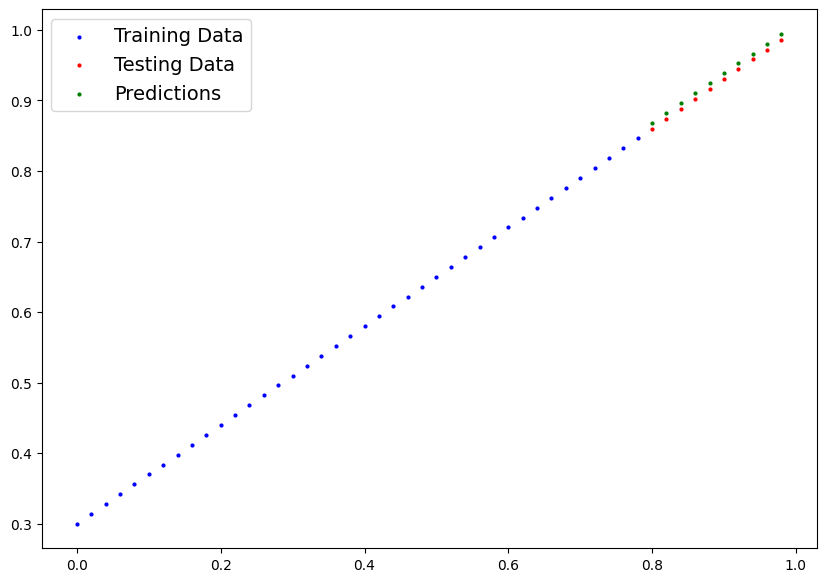

In [106]:
plot_prediction(prediction=test_pred);

In [103]:
plot_prediction(prediction=y_pred);

NameError: ignored

RuntimeError: ignored

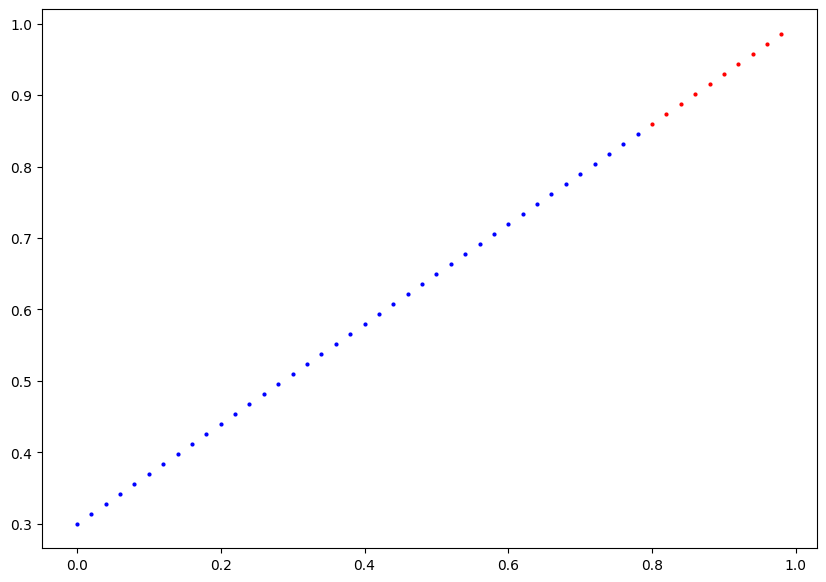